# Question 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

In the Simple Linear Regression model, we are essentailly using a linear eqation to predict an outcome variable. This is followed by the equation: Y = B0 + B1X + E where Y is the outcome vairable, X is the predictor variable, B1 is the slope of the line, B0 is the intercept cofficent (aka when the predictor variable X is 0) and E (error term/epsilon) is the difference between the actual value and the predicted values of Y (since all data has at least some static noise, and are not entirely consistent). 

We would assume that E would be normally distributed with a mean of zero and some constant variance. This means that error values are very close to the mean and have no bias to the mean values. Thus, for even X value, the value of Y is normally distrubted at the given line  B0 + B1X.  

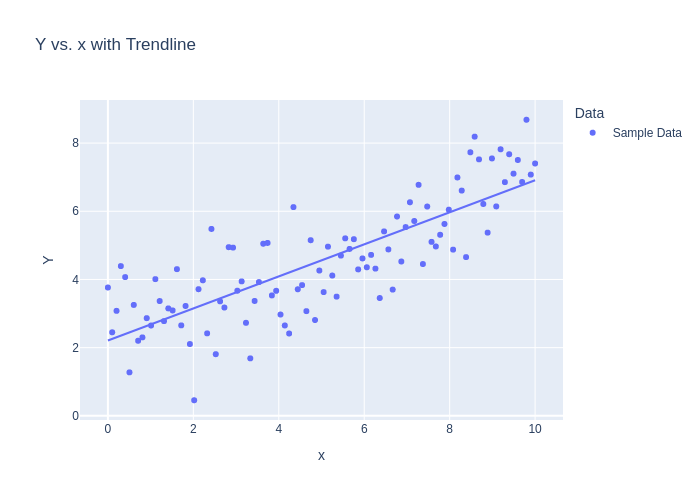

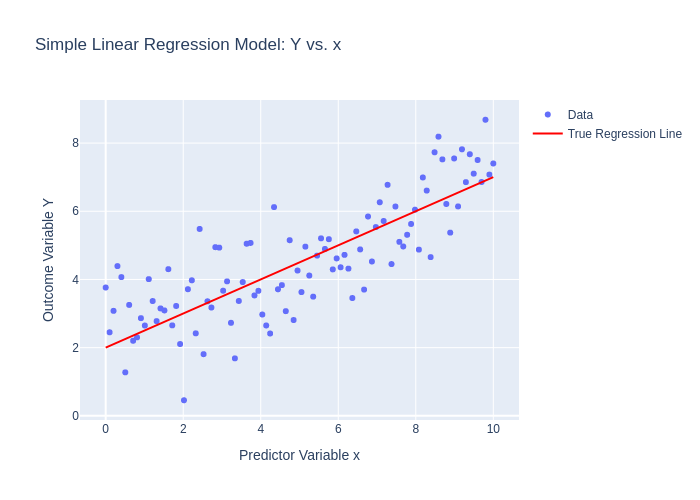

In [26]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Set parameters for the simulation
np.random.seed(0)
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term
n_samples = 100

# Generate predictor variable x and error term epsilon
x = np.linspace(0, 10, n_samples)
epsilon = np.random.normal(0, sigma, n_samples)

# Calculate outcome variable Y
Y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y, 'Data': 'Sample Data'})

# Create a scatter plot with a fitted trendline using plotly.express
fig1 = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Trendline')
fig1.show(renderer="png")

# Create a scatter plot and overlay a regression line using plotly.graph_objects
fig2 = go.Figure()

# Add scatter plot for the data points
fig2.add_trace(go.Scatter(x=df['x'], y=df['Y'], mode='markers', name='Data'))

# Calculate the fitted regression line (using numpy for demonstration purposes)
y_pred = beta_0 + beta_1 * x
fig2.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='True Regression Line', line=dict(color='red')))

# Set plot title and labels
fig2.update_layout(title="Simple Linear Regression Model: Y vs. x",
                   xaxis_title="Predictor Variable x",
                   yaxis_title="Outcome Variable Y")

fig2.show(renderer="png")


In this model, we can see that the regression line act as a line of best fit for the data points, thus assuming a model of normal distribution, and there is no bias towards a higher or lower mean. 

# Chatlog Summary


In this chat, we discussed the theoretical components of a Simple Linear Regression model, including predictor and outcome variables, slope and intercept coefficients, and the error term. We covered the concept of the error term 
ϵ being normally distributed with a mean of 0, meaning that the errors are balanced and centered around zero, with a consistent spread (standard deviation) across values of X. I then provided Python code using numpy and scipy.stats to simulate data from a simple linear regression model and visualize it with a scatter plot and regression line, illustrating these concepts.

https://chatgpt.com/share/67259a7a-6d48-800a-884e-c9cb17f161cb 


# Question 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           3.98e-24
Time:                        03:29:54   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     

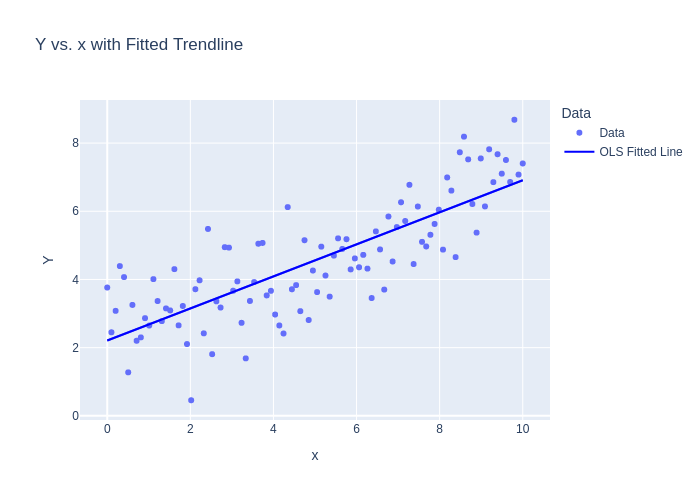

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf  # For statistical modeling

# Simulate data
np.random.seed(0)
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term
n_samples = 100

# Generate predictor variable x and error term epsilon
x = np.linspace(0, 10, n_samples)
epsilon = np.random.normal(0, sigma, n_samples)

# Calculate outcome variable Y
Y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame for modeling and plotting
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 1: Specify and fit the model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()  # Fit the model

# Step 2: Review model outputs
print("Model Summary:") 
print(fitted_model.summary())  # Detailed summary of the model
print("\nCoefficient Table:")
print(fitted_model.summary().tables[1])  # Coefficients table
print("\nParameters (Intercept and Slope):")
print(fitted_model.params)  # Model parameters (intercept and slope)
print("\nParameter Values (as array):")
print(fitted_model.params.values)  # Model parameters as array
print("\nR-squared:")
print(fitted_model.rsquared)  # R-squared of the model

# Step 3: Add categorical column for consistent legend color
df['Data'] = 'Data'  # Adds a category label for color in the legend

# Step 4: Plot using plotly.express with trendline='ols'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Fitted Trendline')

# Step 5: Manually add the fitted regression line based on fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="OLS Fitted Line")

# Show the plot
fig.show(renderer="png")



# Question 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

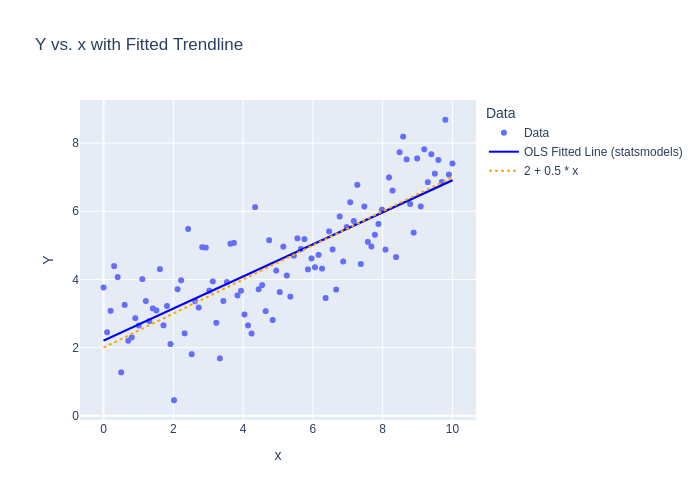

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf  # For statistical modeling

# Simulate data
np.random.seed(0)
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term
n_samples = 100

# Generate predictor variable x and error term epsilon
x = np.linspace(0, 10, n_samples)
epsilon = np.random.normal(0, sigma, n_samples)

# Calculate outcome variable Y
Y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame for modeling and plotting
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 1: Specify and fit the model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()  # Fit the model

# Step 2: Calculate the fitted regression line using estimated parameters
intercept, slope = fitted_model.params['Intercept'], fitted_model.params['x']
y_pred_manual = intercept + slope * x  # Line calculated using model coefficients

# Step 3: Add categorical column for consistent legend color
df['Data'] = 'Data'  # Adds a category label for color in the legend

# Step 4: Plot using plotly.express with trendline='ols'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Fitted Trendline')

# Step 5: Manually add the fitted regression line from statsmodels based on fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="OLS Fitted Line (statsmodels)")

# Step 6: Manually add the line using defined beta_0 and beta_1
x_range = np.array([df['x'].min(), df['x'].max()])  # X range for the manual line
y_line = beta_0 + beta_1 * x_range  # Calculate corresponding Y values
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f"{beta_0} + {beta_1} * x", 
                line=dict(dash='dot', color='orange'))

# Show the plot
fig.show(renderer="png")


The orginal line depicts the theortical fitted line of the data without any random variation (error). Essentially, it is the line Y = B0 + B1X. In contrast, the second line contains epislon (randomness/error), that we would typically see in real life scenarios, due to the nature of random sampling. This follows the formula  Y = B0 + B1X + E. 

# Chatlog summary 

Simple Linear Regression Theory: We discussed the components of a Simple Linear Regression model, including predictor and outcome variables, slope and intercept, and the error term. We covered how the error term is normally distributed around a mean of zero, meaning deviations are random and average out in the long run.

Code Walkthrough:

We looked at how to simulate data using numpy to model a theoretical Simple Linear Regression with given intercept and slope.
We demonstrated how to fit the model using statsmodels and how to extract model details like parameters and R-squared.
We created a visualization with plotly, using a scatter plot and adding trendlines to visualize the fitted regression model.
Adding Lines for Comparison:

We added a regression line using estimated parameters from the fitted model.
Then, we added a manually defined line using the original intercept and slope values, shown as a dashed line for comparison.
The final plot displays the data points, the OLS trendline, the fitted line from statsmodels, and the manually defined line, allowing a clear comparison of each.

https://chatgpt.com/share/67259a7a-6d48-800a-884e-c9cb17f161cb 

# Question 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

In the fitted_model.summary().tables, it contains the param values of the coefficents of X and intercept. In the fitted Simple Linear Regression model y0 = B0 + B1xi, the X coefficent woiuld represent B1, and the intercept coefficent would represent B0. Thus, by plugging in xi values, we can obtain fitted_model.fittedvalues. For example, given that X = 0.5, and B0 = 4, if xi = 2, then y0 = 4 + 0.5*2 = 5. 

# Question 5.  Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") 

The OSL method is a method that minimizes the randomness/error as much as possible. It uses squares to avoid negative errors (all errors are positive) and prioritizes in reducing bigger error values. So, it produces a line that best represents the trends overall.  

# Question 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

The first method includes the sum of squares, where it depcits the the sum of squared residuals over the sum of variation in the observed Y-values values from the mean. This helps capture the accuracy of the Y-values, as it provides a precent/rate of how close the fitted values are to the mean. Thus, we can identify how much variation is in the outcome Y (observed values) using this calculated rate, where the lower the rate, the more vairation it has. This is also known as the R-squared value.

When applied to the fitted model, R-squared is used to measure the strength of the accuracy, and thus, the closer it is to 1, then the more close the fitted Y-values are to the observed Y-values. So, the two np.correcoef(...)[0,1]**2 coefficents actually capture the R^2 value for Simple Regression Models, where method 3 (np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2) shows the relationship between Y and the fitted values, and method 4 (np.corrcoef(Y,x)[0,1]**2) shows the relationship between the actual Y and X values. 

# Chatlog summary

This chat covered the interpretation and calculation of the R-squared value in simple linear regression. Key points discussed include:

1. **R-squared as a Measure of Fit**: R-squared represents the proportion of variance in the dependent variable \(Y\) that is explained by the model. It is computed using the formula \(R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}\), where SS\(_{\text{res}}\) is the sum of squared residuals, and SS\(_{\text{tot}}\) is the total sum of squares.

2. **Interpretation of Expressions**:
   - **`fitted_model.rsquared`**: Directly provides R-squared, indicating model accuracy.
   - **`1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()`**: Also calculates R-squared as the proportion of variation in \(Y\) explained by the model.
   - **`np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`**: Offers an alternative way to compute R-squared by squaring the correlation between \(Y\) and the fitted values.
   - **`np.corrcoef(Y, x)[0,1]**2`**: Squares the correlation between \(Y\) and the predictor \(x\), which gives R-squared in simple linear regression but focuses on the direct relationship between \(Y\) and \(x\).

3. **Main Takeaway**: Each expression provides insight into the proportion of variance in \(Y\) explained by the model, with \(R^2\) indicating model fit, especially in simple linear regression contexts.

https://chatgpt.com/share/672b8b75-62c0-800a-9477-33cabc4acb4c 

# Question 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

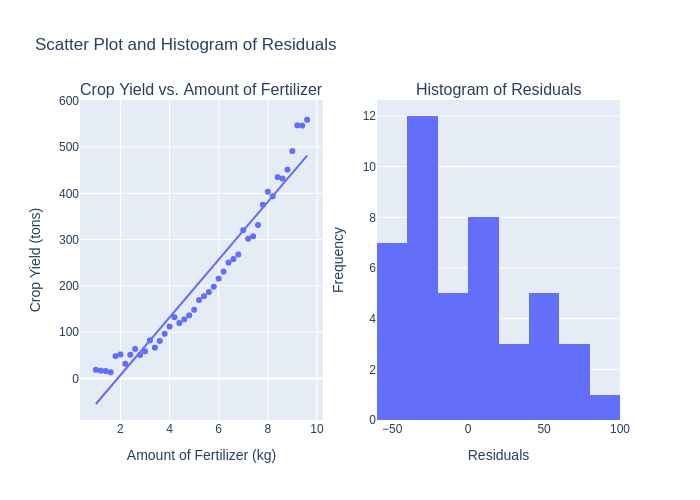

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

In the residual histogram, it does not follow a normal distribution, thus violating the assumption that residuals are normally distibuted. 

# Post-lecture 

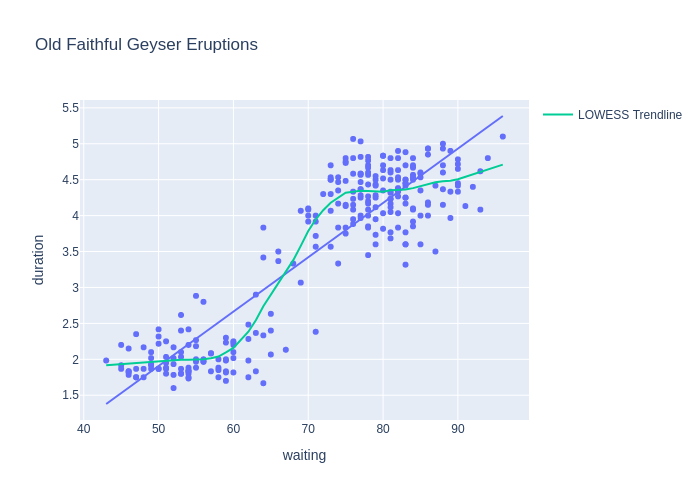

In [8]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.


In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        15:43:07   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: B1 is equal to zero (this means that there is no linear relationship)

HA: B1 is not equal to zero (has a linear relationship) 

Here, we can see that the p-values are 0, indicating that there is very STRONG evidence against the null hypotheis, and so we can make the inference that B1 is not equal to zero, and that there is a linear relationship. 

# Question 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


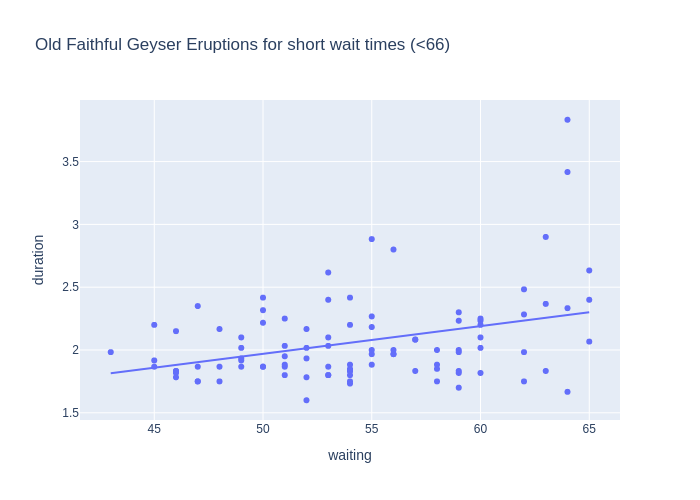

In [23]:

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") #

Here, we can analyze the p-value for waiting for short_wait_limit values of 62, 64, and 66. 

For 62, the p-value is 0.238 
For 64, the p-value is 0.036
For 66, the p-value is 0.000

At 62, there is little to no evidence agaisnt the null as it is greater than 0.05. At 64 there is moderate evidence as it is 0.036<0.05 but 0.036>0.01. And at 66, there is very strong evidence against the null because it is smaller than 0.001. Because the p-value progressively gets smaller as the waiting times increase, it suggests that there is clear evidence between the waiting times and the duration of the eruptions.

Another key factor to note is the line of regression. Visually, we can identify that the higher the waiting time (in the set {62,64,66}), the closer the observed values of Y are clustered closer to the line of best fit. This indicates that the strength of the relationship between the duration and waiting time increases the greater the short_wait_limit value is.  

# Question 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

2. simulate samples (of size n=160) from a Simple Linear Regression model that uses B0 = 1.65, B1 = 0, alpha = 0.37 along with the values of waiting for to create simuations of and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

3. report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

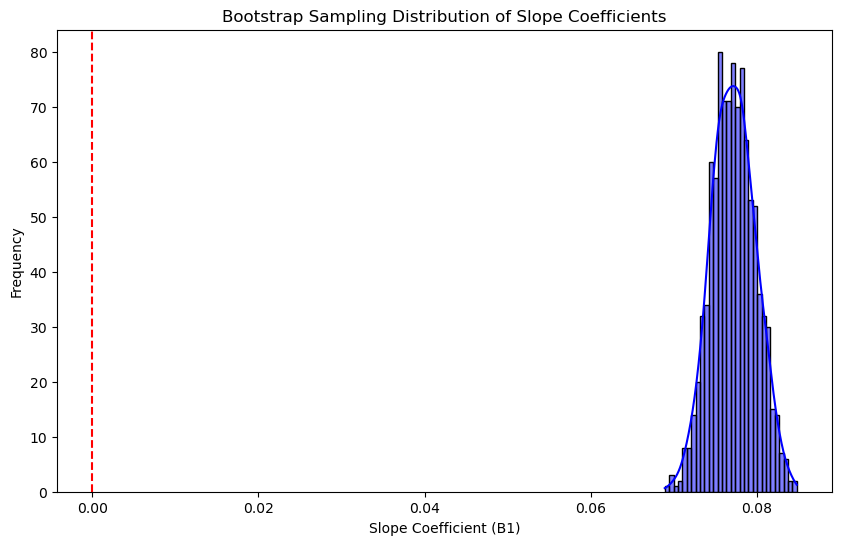

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'geyser' dataset
old_faithful = sns.load_dataset('geyser')

# Filter for long wait times (n=160)
long_wait = old_faithful.sample(n=160, replace=False)  # Subsample of 160 records

# Set number of bootstrap samples
n_bootstraps = 1000
slope_coefficients = []

# Bootstrap process
for _ in range(n_bootstraps):
    # Resample with replacement
    sample = long_wait.sample(n=160, replace=True)
    
    # Fit simple linear regression model
    model = smf.ols('duration ~ waiting', data=sample).fit()
    
    # Collect the slope coefficient (B1)
    slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for easier processing
slope_coefficients = np.array(slope_coefficients)

# Plot the bootstrap distribution of the slope coefficients
plt.figure(figsize=(10, 6))
sns.histplot(slope_coefficients, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Bootstrap Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient (B1)')
plt.ylabel('Frequency')
plt.show()


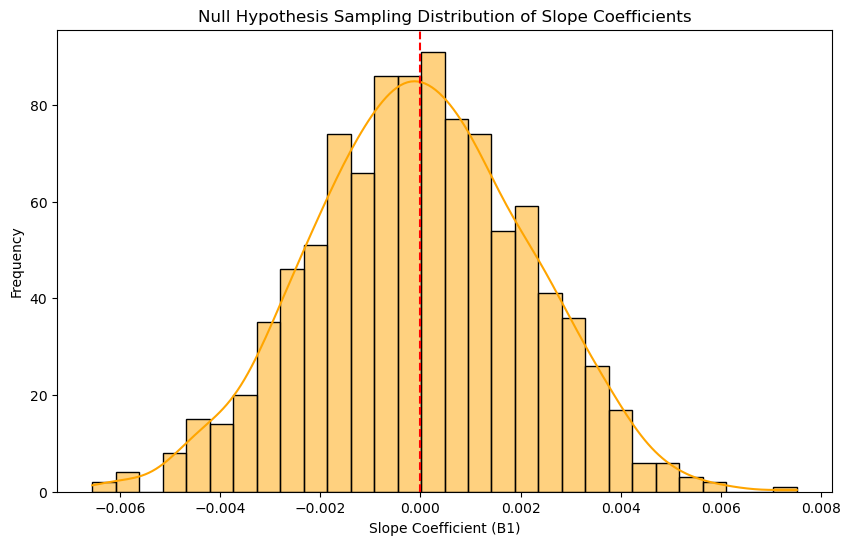

In [36]:
B0 = 1.65
B1 = 0
alpha = 0.37

# Number of simulations
n_simulations = 1000
simulated_slope_coefficients = []

# Simulate data under null hypothesis and fit linear models
for _ in range(n_simulations):
    # Generate random waiting times based on long_wait
    waiting_times = long_wait['waiting'].sample(n=160, replace=True).values
    
    # Simulate duration with no linear association (B1 = 0)
    durations = B0 + B1 * waiting_times + np.random.normal(0, alpha, size=160)
    
    # Create a simulated DataFrame
    simulated_data = pd.DataFrame({'waiting': waiting_times, 'duration': durations})
    
    # Fit the linear model on simulated data
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient (B1)
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

# Convert to numpy array for easier processing
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Plot the null hypothesis distribution of the slope coefficients
plt.figure(figsize=(10, 6))
sns.histplot(simulated_slope_coefficients, kde=True, bins=30, color='orange')
plt.axvline(0, color='red', linestyle='--')
plt.title('Null Hypothesis Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient (B1)')
plt.ylabel('Frequency')
plt.show()

In [37]:
ci_lower = np.percentile(slope_coefficients, 2.5)
ci_upper = np.percentile(slope_coefficients, 97.5)
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

# Check if 0 is contained in the confidence interval
contains_zero = ci_lower <= 0 <= ci_upper
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Calculate p-value from null hypothesis distribution
simulated_p_value = (np.sum(simulated_slope_coefficients >= np.mean(slope_coefficients)) / n_simulations)
print(f"Simulated p-value: {simulated_p_value}")

# Fit original model and get p-value from summary
original_model = smf.ols('duration ~ waiting', data=long_wait).fit()
original_p_value = original_model.pvalues['waiting']
print(f"Original p-value from OLS model: {original_p_value}")

95% Confidence Interval: (0.07211938044128888, 0.08240414841389827)
Does the 95% CI contain 0? No
Simulated p-value: 0.0
Original p-value from OLS model: 1.536974430113025e-60


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


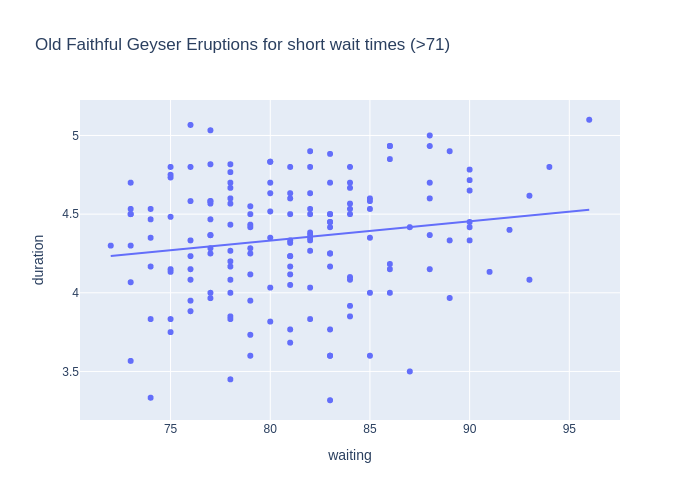

In [38]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

https://chatgpt.com/share/672b99d4-38dc-8001-8621-7fcdf597ea52
(to create the code) 


# Question 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.8740,0.160,-11.702,0.000,-2.189,-1.559
waiting,0.0756,0.002,34.089,0.000,0.071,0.080


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5259,0.337,1.562,0.121,-0.142,1.194
waiting,0.0286,0.006,4.685,0.000,0.017,0.041


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3519,0.439,5.360,0.000,1.486,3.218
waiting,0.0242,0.005,4.445,0.000,0.013,0.035


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


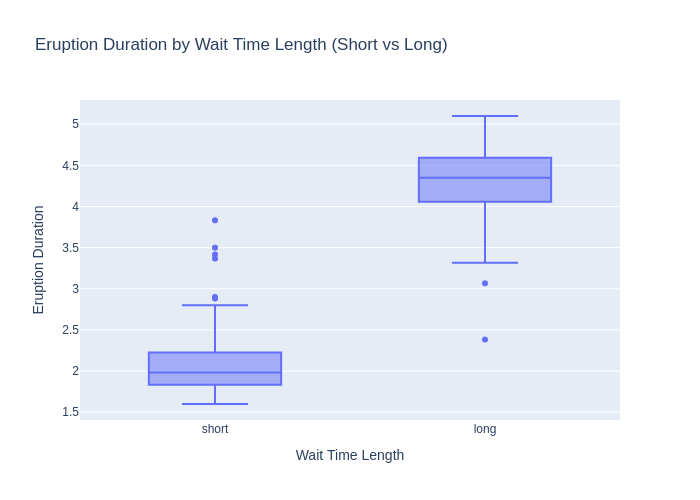

In [8]:
from IPython.display import display
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import plotly.express as px

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define "kind" as "short" or "long" based on the new threshold
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Model 1: Full model with 'waiting' as a continuous variable
model_full = smf.ols('duration ~ waiting', data=old_faithful).fit()
display(model_full.summary().tables[1])

# Model 2: Model with only short wait times
model_short = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'short']).fit()
display(model_short.summary().tables[1])

# Model 3: Model with only long wait times
model_long = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'long']).fit()
display(model_long.summary().tables[1])

# Indicator Variable Model: Using 'kind' as a categorical variable with "short" as the reference
model_indicator = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model_indicator.summary().tables[1])

# Visualization of eruption duration by kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Eruption Duration by Wait Time Length (Short vs Long)',
             category_orders={'kind': ['short', 'long']},
             labels={'kind': 'Wait Time Length', 'duration': 'Eruption Duration'})
fig.show(renderer="png")

Here, we can observe that the p-value for the ki is 0.000. This means that there is very strong evidence against the null, which is that there is no difference between the duration of eruptions of "short" and "long" wait times. Because there is very strong evidence against the null, we can reject it, and make the inference that HA (there is a difference) is true. 


# Chatlog summary

Regression Model with Indicator Variable: We discussed creating a Simple Linear Regression model to analyze the relationship between eruption duration and a newly defined indicator variable for wait times. Instead of the original classification, wait times less than 68 were labeled as "short," and those above were labeled "long."

Code Implementation: We examined code for fitting a model to predict eruption duration based on this new "kind" variable and creating visualizations, including box plots to compare eruption durations between "short" and "long" wait times.

Null Hypothesis Explanation: I clarified the concept of the null hypothesis for this model. Here, the null hypothesis assumes no difference in eruption duration between "short" and "long" wait times. In statistical terms, it implies that the coefficient for the "long" category would be zero, indicating no significant effect of wait time on eruption duration.

https://chatgpt.com/c/672b9466-c310-800a-a5ba-db3290e7aa95 
(this link will probably not work, it would not give me a public link to share as I included a screenshot in the chatlog :/) 

# Question 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np


short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show()

Model 1 is the only histogram that suggests the plausibility of the assumption that the distribution of error terms is normal.

In model 2, it is clear that it is right-skewed and has a very high peak, indicating that it does follow a normally disributed behaviour 

In model 3, the values are more concentrated to the middle, indicating that it has little vairance than a normal distribution would have. 

In model 4, it is also slightly right-skewed, where there are more of a concentration of values to the right than on the left.  

# Question 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

A) Do a permutation test 

In [13]:
import numpy as np

# Define the short and long groups based on the threshold of 68
short_duration = old_faithful[old_faithful['waiting'] < 68]['duration']
long_duration = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Observed difference in means
observed_diff = long_duration.mean() - short_duration.mean()

# Permutation test setup
np.random.seed(42)  # for reproducibility
num_permutations = 10000
perm_diffs = []

# Combine the data into one array for shuffling
combined = np.concatenate([short_duration, long_duration])

# Perform the permutations
for _ in range(num_permutations):
    np.random.shuffle(combined)
    # Split the shuffled data into groups of the same size as original
    perm_short = combined[:len(short_duration)]
    perm_long = combined[len(short_duration):]
    # Calculate the mean difference for this permutation
    perm_diffs.append(perm_long.mean() - perm_short.mean())

# Calculate the empirical p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

# Display results
print("Observed difference in means:", observed_diff)
print("Permutation Test p-value:", p_value)

    

Observed difference in means: 2.2036002325581396
Permutation Test p-value: 0.0


B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

In [14]:
# Define the short and long groups based on the threshold of 68
short_duration = old_faithful[old_faithful['waiting'] < 68]['duration']
long_duration = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Number of bootstrap samples
num_bootstrap_samples = 10000
bootstrapped_mean_diffs = []

# Bootstrapping process
np.random.seed(42)  # for reproducibility

for _ in range(num_bootstrap_samples):
    # Resample with replacement within each group
    short_sample = np.random.choice(short_duration, size=len(short_duration), replace=True)
    long_sample = np.random.choice(long_duration, size=len(long_duration), replace=True)
    
    # Calculate the mean difference for this bootstrap sample
    mean_diff = long_sample.mean() - short_sample.mean()
    bootstrapped_mean_diffs.append(mean_diff)

# Calculate the 95% bootstrap confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

# Display the results
print("95% Bootstrap Confidence Interval for the Difference in Means:", (ci_lower, ci_upper))


95% Bootstrap Confidence Interval for the Difference in Means: (2.1048456918604654, 2.298470406976744)


a) Explain how the sampling approaches work for the two simulations.

In the first approach (permutation test), it tests the null hypothesis that there is no different between the short waiting time and the long waiting time with respect to the duration of the eruption. First, we make two groups: short waiting time and long waiting time. Then, we randomly permute or shuffle the combined dataset, creating samples that would reflect the null (no difference between the groups). After repeating this a large number of times, we can observe the difference between the short and long wait times, and compare it to the distribution. Then the p-value would be the proportion of permuted differences as extreme or more extreme than the oberserved difference 

In the second approach (the bootstrapped data), we randomly indepndently sample each group (short and long) with replacement. Then, we calculate the differnce in means for each group. After repeating this many times, we can form a distribution of mean differences. THhus, we can get a 95% interval for the difference in means, in which we can say with 95% confidence that the 'true' value lies somewhere in that interval.

b) Compared to indicator variable based model approach, bootstrap and permutation are more flexible as they are suited for situations based on less assumptions, while indicator variable is more assumption-driven 

# Chatlog summary 
In this conversation, you were working through several statistical tasks involving wait times and eruption durations from the Old Faithful dataset. Here's a summary:

1. **Indicator Variable Model**: We discussed the **indicator variable-based model approach** to compare "short" and "long" wait times. In this approach, a categorical variable (like "kind" to represent short or long wait times) is transformed into an indicator variable (e.g., 0 for "short" and 1 for "long"), allowing us to compare differences in eruption duration between these groups in a regression framework.

2. **Permuation Test**: We set up a permutation test to test the hypothesis \( H_0: \text{duration}_{\text{short}} = \text{duration}_{\text{long}} \), where differences in mean durations are calculated under random shuffles of the group labels to see if observed differences are statistically significant.

3. **Bootstrap Confidence Interval**: You calculated a 95% bootstrap confidence interval for the difference in means between "short" and "long" groups. This involved repeatedly resampling from each group, computing the mean differences, and using the `np.quantile` function to establish the interval bounds.

4. **Comparison of Methods**: You sought to compare the permutation test, bootstrap method, and indicator variable model approach. Each has its unique way of analyzing the difference between groups:
   - **Permutation Test**: Randomly shuffles group labels to test if differences are due to chance.
   - **Bootstrap Method**: Uses repeated resampling to estimate a confidence interval for the difference in means.
   - **Indicator Variable Model**: Uses regression to estimate the effect size of the difference directly, which also enables hypothesis testing for group differences.

These methods offer complementary ways to assess the relationship between waiting times and eruption durations, with the permutation and bootstrap approaches focusing on non-parametric inference, and the indicator variable model providing parametric estimates directly within a regression framework.

https://chatgpt.com/c/672b9466-c310-800a-a5ba-db3290e7aa95
(same issue, cannot share public link :( ) 

# Question 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Somewhat 